In [1]:
import itertools
import sys, os

import numpy as np
import pandas as pd
from scipy.special import comb
from scipy import stats
import scipy.cluster.hierarchy as hac
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import statsmodels.api as sm

#%config InlineBackend.figure_formats = ['svg']

sns.set(rc={'figure.figsize':(15,8)})
sns.set_context('poster')
sns.set_style('white')
#plt.rcParams["figure.dpi"] = 600
plt.rcParams['legend.numpoints'] = 1
from sklearn.model_selection import train_test_split

In [2]:
from seaborn_figure_settings import * 


In [3]:
save_dpath = os.path.join('../notebooks/figures/', 'sup_fig_FL')
os.makedirs(save_dpath,exist_ok=True)

In [4]:
HCOLOR_dark = '#A67B5B'
HCOLOR = '#ECB176'
HCOLOR_light = '#803D3B'

PCOLOR_dark = '#006769'
PCOLOR = '#40A578'
PCOLOR_light = '#9DDE8B'


In [5]:
# fg -> umol 14 (N mulecular weight) * 1e-9 (fmol -> umol)
# switch to C biomass
Qp = 12.5  * 1e-9 / 14
Qh = 40 * 1e-9 / 14

Qp

8.92857142857143e-10

In [6]:
import statsmodels.api as sm

In [7]:
%load_ext autoreload
%autoreload 2
#import CCPA_lib as cp

In [8]:
horder = ['Axenic', 'HOT1A3', 'HP15', 'Pgall', 'CIP', 'DSS-3', 'nitzsch',
       'mit0604', 'k-12', 'HOT5_F3', 'HOT5_C3']


In [9]:
os.listdir('data')

['CCPA.pkl.gz',
 'shading experiment',
 '10cc FL.xlsx',
 '10cc_FCM_MPN_results.xlsx',
 '10cc metadata.xlsx',
 'Growth curves A-D Yara.xlsx',
 'Yara_pro99_axenic.xlsx',
 '10cc FACS results.xlsx']

In [10]:
#data = pd.read_excel(os.path.join('data', 'Osnat_20CC_het_select.xlsx'), 
#              index_col='date', sheet_name='FL').T.reset_index(drop=True)
data_df = pd.read_excel(os.path.join('data', '10cc FL.xlsx'), 
              index_col='date', sheet_name='FL0').T.reset_index(drop=True)
data1_df = pd.read_excel(os.path.join('data', '10cc FL.xlsx'), 
              index_col='date', sheet_name='FL1').T.reset_index(drop=True)
data4_df = pd.read_excel(os.path.join('data', '10cc FL.xlsx'), 
              index_col='date', sheet_name='FL2').T.reset_index(drop=True)
data5_df = pd.read_excel(os.path.join('data', '10cc FL.xlsx'), 
              index_col='date', sheet_name='FL3').T.reset_index(drop=True)
data6_df = pd.read_excel(os.path.join('data', '10cc FL.xlsx'), 
              index_col='date', sheet_name='FL4').T.reset_index(drop=True)
data7_df = pd.read_excel(os.path.join('data', '10cc FL.xlsx'), 
              index_col='date', sheet_name='FL5').T.reset_index(drop=True)

In [11]:
pro99_df = pd.read_excel(os.path.join('data', 'Yara_pro99_axenic.xlsx',))

In [12]:
pro99_df.columns

Index(['Date', 'Day', 'Pro99_axenicA', 'Pro99_axenicB', 'Pro99_axenicC'], dtype='object')

In [13]:
pro99_mdf = pro99_df.melt(id_vars=['Date', 'Day'], value_name='FL', var_name='Sample', )

In [14]:
#data = pd.read_excel(os.path.join('data', 'Osnat_20CC_het_select.xlsx'), 
#              index_col='date', sheet_name='FL').T.reset_index(drop=True)
data2_df = pd.read_excel(os.path.join('data', '10cc FL.xlsx'), 
              index_col='date', sheet_name='3FL transfer0').T.reset_index(drop=True)

In [15]:
#data = pd.read_excel(os.path.join('data', 'Osnat_20CC_het_select.xlsx'), 
#              index_col='date', sheet_name='FL').T.reset_index(drop=True)
data3_df = pd.read_excel(os.path.join('data', '10cc FL.xlsx'), 
              index_col='date', sheet_name='3FL transfer 1').T.reset_index(drop=True)

In [16]:
meta_df = pd.read_excel(os.path.join('data', '10cc metadata.xlsx'), 
               sheet_name='metadata') #.T.reset_index(drop=True)
meta2_df = pd.read_excel(os.path.join('data', '10cc metadata.xlsx'), 
               sheet_name='metadata2') #.T.reset_index(drop=True)

In [17]:
mpn_df = pd.read_excel(os.path.join('data', '10cc_FCM_MPN_results.xlsx',))


In [18]:
os.listdir('data')

['CCPA.pkl.gz',
 'shading experiment',
 '10cc FL.xlsx',
 '10cc_FCM_MPN_results.xlsx',
 '10cc metadata.xlsx',
 'Growth curves A-D Yara.xlsx',
 'Yara_pro99_axenic.xlsx',
 '10cc FACS results.xlsx']

In [19]:
 fcm_df = pd.read_excel(os.path.join('data', '10cc FACS results.xlsx'))
 fcm_df

,Unnamed: 0,tube,Sample,id,replicate,transfer,dilution,sybr,problematic,flow,heterotroph,full name,date,transfer day,med4,het,med4 | Count,med4 beads | Count,het | Count
0,0,specimen_1_CC_001+sybr_Tube_002_032.fcs,1A1,1,A,1.0,100.0,sybr,NaN,0.15690,Axenic,Axenic,2021-05-12 11:49:00,19.817361,NaN,NaN,NaN,NaN,NaN
1,1,specimen_1_CC_001+sybr_Tube_003_033.fcs,1B1,1,B,1.0,100.0,sybr,NaN,0.15690,Axenic,Axenic,2021-05-12 11:49:00,19.817361,NaN,NaN,NaN,NaN,NaN
2,2,specimen_1_CC_001+sybr_Tube_004_034.fcs,1C1,1,C,1.0,100.0,sybr,NaN,0.15690,Axenic,Axenic,2021-05-12 11:49:00,19.817361,NaN,NaN,NaN,NaN,NaN
3,4,specimen_1_CC_001+sybr_Tube_006_036.fcs,2B1,2,B,1.0,100.0,sybr,NaN,0.15690,HOT1A3,A. macleodii 1A3,2021-05-12 11:49:00,19.817361,NaN,NaN,NaN,NaN,NaN
4,5,specimen_1_CC_001+sybr_Tube_007_037.fcs,2C1,2,C,1.0,100.0,sybr,NaN,0.15690,HOT1A3,A. macleodii 1A3,2021-05-12 11:49:00,19.817361,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,485,specimen_3_CC+sybr_Tube_032_190.fcs,9C5,9,C,5.0,100.0,sybr,NaN,0.12555,k-12,E. coli,2021-08-29 15:49:00,128.984028,NaN,NaN,NaN,NaN,5.0
467,486,specimen_3_CC+sybr_Tube_033_191.fcs,10C5,10,C,5.0,100.0,sybr,NaN,0.12555,HOT5_F3,Marinovum 5F3,2021-08-29 15:49:00,128.984028,NaN,4.488252e+06,NaN,NaN,5635.0
468,487,specimen_3_CC+sybr_Tube_034_192.fcs,11C5,11,C,5.0,100.0,sybr,NaN,0.12555,HOT5_C3,Roseovarius 5C3,2021-08-29 15:49:00,128.984028,NaN,1.673437e+06,NaN,NaN,2101.0
469,488,Mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,37479.0


In [20]:
fcm_df.columns

Index(['Unnamed: 0', 'tube', 'Sample', 'id', 'replicate', 'transfer',
       'dilution', 'sybr', 'problematic', 'flow', 'heterotroph', 'full name',
       'date', 'transfer day', 'med4', 'het', 'med4 | Count',
       'med4 beads | Count', 'het | Count'],
      dtype='object')

In [21]:
fcm_mdf= fcm_df.loc[fcm_df.problematic != 'yes'].melt(
    id_vars=['tube', 'Sample', 'id', 'replicate', 'transfer',
        'heterotroph', 'full name',
       'date', 'transfer day',],
    value_vars=['med4', 'het',],)


In [22]:
fcm_mdf = fcm_mdf.dropna(subset=['value'])

In [23]:
penalty_df = pd.read_csv(os.path.join('data', 'shading experiment', 'het_shading_penalty.csv'))


In [24]:
mdf1 = pd.melt(data_df, id_vars='day', var_name='Sample', value_name='FL')
mdf11= pd.melt(data1_df, id_vars='day', var_name='Sample', value_name='FL')
mdf2 = pd.melt(data2_df, id_vars='day', var_name='Sample', value_name='FL')
mdf3 = pd.melt(data3_df, id_vars='day', var_name='Sample', value_name='FL')
mdf4 = pd.melt(data4_df, id_vars='day', var_name='Sample', value_name='FL')
mdf5 = pd.melt(data5_df, id_vars='day', var_name='Sample', value_name='FL')
mdf6 = pd.melt(data6_df, id_vars='day', var_name='Sample', value_name='FL')
mdf7 = pd.melt(data7_df, id_vars='day', var_name='Sample', value_name='FL')


In [25]:
mdf = pd.concat([mdf1, mdf11, mdf2, mdf3, mdf4, mdf5, mdf6, mdf7])

In [26]:
mdf.head()

,day,Sample,FL
0,0.000000,1A0,0.122
1,1.081944,1A0,0.034
2,2.164583,1A0,0.159
3,2.747222,1A0,0.227
4,3.754167,1A0,0.306


In [27]:
mdf['id'] = pd.to_numeric(mdf.Sample.str.slice(start=0, stop=-2))
mdf['replicate'] = mdf.Sample.str.slice(start=-2, stop=-1)
mdf['transfer'] = pd.to_numeric(mdf.Sample.str.slice(start=-1))


In [28]:
mdf = pd.merge(mdf, meta_df, on='id', how='left')
mdf = pd.merge(mdf, meta2_df, on='transfer', how='left')


In [29]:
mdf.columns

Index(['day', 'Sample', 'FL', 'id', 'replicate', 'transfer', 'heterotroph',
       'full name', 'date', 'transfer day'],
      dtype='object')

In [30]:
d2 = mdf.loc[mdf['full name'].isin(['Axenic'])].copy()
d2['full name'] = 'Axenic2'
d3 = mdf.loc[mdf['full name'].isin(['Axenic'])].copy()
d3['full name'] = 'Axenic3'
d4 = mdf.loc[mdf['full name'].isin(['Axenic'])].copy()
d4['full name'] = 'Axenic4'



In [31]:
mdf['full name'].unique()

array(['Axenic', 'A. macleodii 1A3', 'Marinobacter adhaerens HP15',
       'Phaeobacter gallaeciensis', 'Pseudoalteromonas haloplanktis',
       'Ruegeria pomeroyi', 'Sulfitobacter pseudonitzschiae',
       'Prochlorococcus mit0604', 'E. coli', 'Marinovum 5F3',
       'Roseovarius 5C3'], dtype=object)

In [32]:
mdf

,day,Sample,FL,id,replicate,transfer,heterotroph,full name,date,transfer day
0,0.000000,1A0,0.122,1,A,0,Axenic,Axenic,2021-04-22 16:12:00,0.000000
1,1.081944,1A0,0.034,1,A,0,Axenic,Axenic,2021-04-22 16:12:00,0.000000
2,2.164583,1A0,0.159,1,A,0,Axenic,Axenic,2021-04-22 16:12:00,0.000000
3,2.747222,1A0,0.227,1,A,0,Axenic,Axenic,2021-04-22 16:12:00,0.000000
4,3.754167,1A0,0.306,1,A,0,Axenic,Axenic,2021-04-22 16:12:00,0.000000
...,...,...,...,...,...,...,...,...,...,...
9628,48.937500,11C5,0.019,11,C,5,HOT5_C3,Roseovarius 5C3,2021-08-29 15:49:00,128.984028
9629,51.813194,11C5,0.028,11,C,5,HOT5_C3,Roseovarius 5C3,2021-08-29 15:49:00,128.984028
9630,52.784028,11C5,0.058,11,C,5,HOT5_C3,Roseovarius 5C3,2021-08-29 15:49:00,128.984028
9631,59.947917,11C5,0.033,11,C,5,HOT5_C3,Roseovarius 5C3,2021-08-29 15:49:00,128.984028


In [33]:
axenic = ['Axenic']

group1 = ['A. macleodii 1A3', 'Pseudoalteromonas haloplanktis',]

group2 = ['Sulfitobacter pseudonitzschiae','Ruegeria pomeroyi', ]
group3 = [ #'Prochlorococcus mit0604',
  #  'E. coli',
         'Marinovum 5F3','Roseovarius 5C3']
group4 = [ 
       'Marinobacter adhaerens HP15',
       'Phaeobacter gallaeciensis', ]

mdf.loc[mdf['full name'].isin(axenic), 'Group'] = 'Axenic'
mdf.loc[mdf['full name'].isin(group1), 'Group'] = 'Strong'
mdf.loc[mdf['full name'].isin(group2), 'Group'] = 'Sustained'
mdf.loc[mdf['full name'].isin(group3), 'Group'] = 'Weak'
mdf.loc[mdf['full name'].isin(group4), 'Group'] = 'Inhibited'

horder =  group1 + group2 + group3 + group4 + ['Axenic']
# ['Axenic', 'HOT1A3',  'CIP',  'nitzsch', 'mit0604',
#           'DSS-3','k-12','HOT5_F3', 'HOT5_C3'
#           'HP15', 'Pgall',
#          ]
gorder = ['Sustained', 'Strong', 'Weak', 'Inhibited',   'Axenic',  ]
hpalette1 = sns.color_palette("Dark2", n_colors=len(group1)).as_hex() 
hpalette2 = sns.color_palette("terrain", n_colors=len(group2)).as_hex()  
hpalette3 = sns.color_palette("winter", n_colors=len(group3)+1).as_hex()[1:]  
hpalette4 = sns.color_palette("spring", n_colors=len(group4)).as_hex()

transfer_days = [20, 42, 60, 81, 129]
transfer_days = [42, 60, 81, 129]


hpalette =  hpalette1 + hpalette2 + hpalette3 + hpalette4 + ['black']
gpalette = [ hpalette[7], hpalette[1], hpalette[3], hpalette[5], hpalette[8],]
sns.color_palette(hpalette)


[(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
 (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
 (0.3333333333333333, 0.8666666666666667, 0.4666666666666667),
 (0.6666666666666666, 0.5725490196078431, 0.4196078431372549),
 (0.0, 0.5019607843137255, 0.7490196078431373),
 (0.0, 0.7529411764705882, 0.6235294117647059),
 (1.0, 0.3333333333333333, 0.6666666666666666),
 (1.0, 0.6666666666666666, 0.3333333333333333),
 (0.0, 0.0, 0.0)]

In [34]:
mpn_df.loc[mpn_df['full name'].isin(axenic), 'Group'] = 'Axenic'
mpn_df.loc[mpn_df['full name'].isin(group1), 'Group'] = 'Strong'
mpn_df.loc[mpn_df['full name'].isin(group2), 'Group'] = 'Sustained'
mpn_df.loc[mpn_df['full name'].isin(group3), 'Group'] = 'Weak'
mpn_df.loc[mpn_df['full name'].isin(group4), 'Group'] = 'Inhibited'


In [35]:
gorder = [ 'Strong', 'Sustained', 'Inhibited', 'Weak', 'Neutral',   'Other']
gpalette = ['#882255', '#CC6677', '#332288', 
             '#44AA99','#88CCEE',
            '#D0CFCA',  ]

sns.color_palette(gpalette)

[(0.5333333333333333, 0.13333333333333333, 0.3333333333333333),
 (0.8, 0.4, 0.4666666666666667),
 (0.2, 0.13333333333333333, 0.5333333333333333),
 (0.26666666666666666, 0.6666666666666666, 0.6),
 (0.5333333333333333, 0.8, 0.9333333333333333),
 (0.8156862745098039, 0.8117647058823529, 0.792156862745098)]

In [36]:
horder

['A. macleodii 1A3',
 'Pseudoalteromonas haloplanktis',
 'Sulfitobacter pseudonitzschiae',
 'Ruegeria pomeroyi',
 'Marinovum 5F3',
 'Roseovarius 5C3',
 'Marinobacter adhaerens HP15',
 'Phaeobacter gallaeciensis',
 'Axenic']

In [37]:
# order based on tree order
horder_tree = ['Pseudoalteromonas haloplanktis',
 'Alteromonas macleodii',
 'Marinobacter adhaerens',
 'Phaeobacter gallaeciensis',
 'Ruegeria pomeroyi',
 'Marinovum HOT5_F3',
 'Roseovarius HOT5_C3',
 'Sulfitobacter pseudonitzschiae']

horder_tree = ['Pseudoalteromonas haloplanktis',
 'A. macleodii 1A3',
 'Marinobacter adhaerens HP15',
 'Phaeobacter gallaeciensis',
 'Ruegeria pomeroyi',
 'Marinovum 5F3',
 'Roseovarius 5C3',
 'Sulfitobacter pseudonitzschiae']

gorder_tree = [
'Strong',
 'Strong',
 'Inhibited',
 'Inhibited',
 'Sustained',
 'Weak',
 'Weak',
 'Sustained']
gorder_full = [
'Strong',
 'Strong',
 'Sustained',
 'Sustained',
 'Weak',
 'Weak',
 'Inhibited',
 'Inhibited',
]

gpalette_dict = dict(zip(gorder, gpalette))
hpalette_tree = [gpalette_dict[i] for i in gorder_tree]
hpalette_g = [gpalette_dict[i] for i in gorder_full]
sns.color_palette(hpalette_tree)

[(0.5333333333333333, 0.13333333333333333, 0.3333333333333333),
 (0.5333333333333333, 0.13333333333333333, 0.3333333333333333),
 (0.2, 0.13333333333333333, 0.5333333333333333),
 (0.2, 0.13333333333333333, 0.5333333333333333),
 (0.8, 0.4, 0.4666666666666667),
 (0.26666666666666666, 0.6666666666666666, 0.6),
 (0.26666666666666666, 0.6666666666666666, 0.6),
 (0.8, 0.4, 0.4666666666666667)]

In [38]:
mdf.loc[mdf.Group.isin(['Axenic'])]

,day,Sample,FL,id,replicate,transfer,heterotroph,full name,date,transfer day,Group
0,0.000000,1A0,0.122,1,A,0,Axenic,Axenic,2021-04-22 16:12:00,0.000000,Axenic
1,1.081944,1A0,0.034,1,A,0,Axenic,Axenic,2021-04-22 16:12:00,0.000000,Axenic
2,2.164583,1A0,0.159,1,A,0,Axenic,Axenic,2021-04-22 16:12:00,0.000000,Axenic
3,2.747222,1A0,0.227,1,A,0,Axenic,Axenic,2021-04-22 16:12:00,0.000000,Axenic
4,3.754167,1A0,0.306,1,A,0,Axenic,Axenic,2021-04-22 16:12:00,0.000000,Axenic
...,...,...,...,...,...,...,...,...,...,...,...
9169,48.937500,1C5,0.005,1,C,5,Axenic,Axenic,2021-08-29 15:49:00,128.984028,Axenic
9170,51.813194,1C5,0.014,1,C,5,Axenic,Axenic,2021-08-29 15:49:00,128.984028,Axenic
9171,52.784028,1C5,0.009,1,C,5,Axenic,Axenic,2021-08-29 15:49:00,128.984028,Axenic
9172,59.947917,1C5,0.029,1,C,5,Axenic,Axenic,2021-08-29 15:49:00,128.984028,Axenic


In [39]:
print('\n'.join(group3 + group4))

Marinovum 5F3
Roseovarius 5C3
Marinobacter adhaerens HP15
Phaeobacter gallaeciensis


In [40]:
mdf['FL_clip'] = mdf['FL'].clip(0.04)

In [41]:
transfer_days

[42, 60, 81, 129]

In [42]:
fcm_mdf['transfer_success'] = fcm_mdf['Sample'].map((mdf.groupby(['Sample'])['FL'].max() > 0.1))

In [43]:
gorder

['Strong', 'Sustained', 'Inhibited', 'Weak', 'Neutral', 'Other']

In [44]:
fcm_mdf.variable.unique()
fcm_mdf.variable = fcm_mdf.variable.map({
    'med4' : 'med4 (FCM)', 
    'het' : 'het (FCM)', 
})

In [45]:
fcm_mdf['Sample'] = fcm_mdf['id'].astype('str') + fcm_mdf['replicate'] + '0'

In [46]:
fcm_mdf.loc[fcm_mdf.variable.isin(['med4 (FCM)']) & ~fcm_mdf.id.isin([8])]

,tube,Sample,id,replicate,transfer,heterotroph,full name,date,transfer day,variable,value,transfer_success
26,specimen_1_CC_001_Tube_002_001.fcs,1A0,1,A,1.0,Axenic,Axenic,2021-05-12 11:49:00,19.817361,med4 (FCM),9.581642e+06,True
27,specimen_1_CC_001_Tube_003_002.fcs,1B0,1,B,1.0,Axenic,Axenic,2021-05-12 11:49:00,19.817361,med4 (FCM),4.938495e+06,False
28,specimen_1_CC_001_Tube_004_003.fcs,1C0,1,C,1.0,Axenic,Axenic,2021-05-12 11:49:00,19.817361,med4 (FCM),4.415860e+06,False
29,specimen_1_CC_001_Tube_005_004.fcs,2A0,2,A,1.0,HOT1A3,A. macleodii 1A3,2021-05-12 11:49:00,19.817361,med4 (FCM),4.240275e+07,True
30,specimen_1_CC_001_Tube_006_005.fcs,2B0,2,B,1.0,HOT1A3,A. macleodii 1A3,2021-05-12 11:49:00,19.817361,med4 (FCM),6.931002e+07,True
...,...,...,...,...,...,...,...,...,...,...,...,...
314,specimen_3_CC_Tube_028_154.fcs,5C0,5,C,5.0,CIP,Pseudoalteromonas haloplanktis,2021-08-29 15:49:00,128.984028,med4 (FCM),6.403112e+04,False
315,specimen_3_CC_Tube_029_155.fcs,6C0,6,C,5.0,DSS-3,Ruegeria pomeroyi,2021-08-29 15:49:00,128.984028,med4 (FCM),8.053329e+05,False
316,specimen_3_CC_Tube_030_156.fcs,7C0,7,C,5.0,nitzsch,Sulfitobacter pseudonitzschiae,2021-08-29 15:49:00,128.984028,med4 (FCM),1.304324e+05,False
317,specimen_3_CC_Tube_032_157.fcs,9C0,9,C,5.0,k-12,E. coli,2021-08-29 15:49:00,128.984028,med4 (FCM),1.472393e+03,False


In [47]:
rel_mdf = mdf.loc[(mdf.transfer == 0) & (mdf.id != 8)].copy()

# interpolate HET values

In [48]:
timepoints = mdf.loc[(mdf.transfer == 0) & (mdf.id != 8)].day.drop_duplicates().sort_values()
timepoints

0       0.000000
1       1.081944
2       2.164583
3       2.747222
4       3.754167
         ...    
47    110.943750
48    115.845833
49    118.788889
50    121.777778
51    128.767361
Name: day, Length: 74, dtype: float64

In [49]:
het_fcm = mpn_df.loc[~mpn_df['id'].isin([8])].pivot(columns='Sample', index='transfer day', values='total - med4')
het_fcm = pd.concat([het_fcm.reindex(timepoints), het_fcm])
het_fcm.loc[0] = 1e7
het_fcm = het_fcm.sort_index()
het_fcm

Sample,10A,10B,10C,11A,11B,11C,1A,1B,1C,2A,...,5C,6A,6B,6C,7A,7B,7C,9A,9B,9C
0.000000,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,...,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07
1.081944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.164583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.747222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.754167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115.845833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118.788889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121.777778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
128.767361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
het_fcm = het_fcm.interpolate(method='index')

In [51]:
het_fcm = het_fcm.reset_index(names='day')

In [52]:
het_fcm

Sample,day,10A,10B,10C,11A,11B,11C,1A,1B,1C,...,5C,6A,6B,6C,7A,7B,7C,9A,9B,9C
0,0.000000,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,...,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07
1,1.081944,1.081413e+07,1.104541e+07,1.077102e+07,1.316669e+07,1.512801e+07,1.539429e+07,1.021871e+07,1.025828e+07,1.008106e+07,...,8.897769e+06,9.959444e+06,9.924697e+06,9.970099e+06,1.677319e+07,1.686242e+07,2.815527e+07,9.762188e+06,9.724379e+06,1.033039e+07
2,2.164583,1.162878e+07,1.209150e+07,1.154254e+07,1.633541e+07,2.025932e+07,2.079205e+07,1.043756e+07,1.051672e+07,1.016217e+07,...,7.794831e+06,9.918861e+06,9.849345e+06,9.940179e+06,2.355073e+07,2.372925e+07,4.632220e+07,9.524223e+06,9.448581e+06,1.066099e+07
3,2.747222,1.206719e+07,1.265446e+07,1.195775e+07,1.804071e+07,2.302081e+07,2.369693e+07,1.055534e+07,1.065581e+07,1.020582e+07,...,7.201268e+06,9.897021e+06,9.808794e+06,9.924078e+06,2.719816e+07,2.742474e+07,5.609901e+07,9.396159e+06,9.300157e+06,1.083891e+07
4,3.754167,1.282488e+07,1.362741e+07,1.267532e+07,2.098789e+07,2.779335e+07,2.871730e+07,1.075889e+07,1.089618e+07,1.028126e+07,...,6.175444e+06,9.859276e+06,9.738711e+06,9.896250e+06,3.350184e+07,3.381147e+07,7.299576e+07,9.174832e+06,9.043642e+06,1.114640e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,115.845833,1.877073e+07,8.807761e+06,6.623022e+06,7.274174e+06,9.216871e+06,6.269288e+06,7.104582e+05,4.328643e+05,1.257775e+05,...,3.496082e+06,1.675487e+06,3.391598e+05,-6.046488e+04,1.020540e+08,3.094817e+07,5.920634e+06,1.714329e+06,8.046905e+05,8.440064e+05
75,118.788889,1.898318e+07,8.380391e+06,6.142048e+06,6.089854e+06,7.820717e+06,5.239759e+06,5.696100e+05,3.359036e+05,9.727658e+04,...,3.018141e+06,1.289042e+06,1.116732e+05,-1.935994e+05,1.096480e+08,3.308064e+07,6.347932e+06,1.342132e+06,6.308241e+05,6.555048e+05
76,121.777778,1.919895e+07,7.946366e+06,5.653585e+06,4.887089e+06,6.402820e+06,4.194198e+06,4.265682e+05,2.374328e+05,6.833180e+04,...,2.532758e+06,8.965789e+05,-1.193562e+05,-3.288073e+05,1.173603e+08,3.524633e+07,6.781885e+06,9.641385e+05,4.542499e+05,4.640676e+05
77,128.767361,1.970351e+07,6.931387e+06,4.511301e+06,2.074398e+06,3.087037e+06,1.749129e+06,9.206197e+04,7.156619e+03,6.437909e+02,...,1.397678e+06,-2.120449e+04,-6.596237e+05,-6.449940e+05,1.353956e+08,4.031083e+07,7.796692e+06,8.019293e+04,4.132731e+04,1.638750e+04


In [53]:
het_fcm_melt = het_fcm.melt(value_name='interpolated_het_FCM', id_vars='day')


In [54]:
het_fcm_melt['Sample'] = het_fcm_melt['Sample'] + '0'

In [55]:
het_fcm_melt

,day,Sample,interpolated_het_FCM
0,0.000000,10A0,1.000000e+07
1,1.081944,10A0,1.081413e+07
2,2.164583,10A0,1.162878e+07
3,2.747222,10A0,1.206719e+07
4,3.754167,10A0,1.282488e+07
...,...,...,...
2365,115.845833,9C0,8.440064e+05
2366,118.788889,9C0,6.555048e+05
2367,121.777778,9C0,4.640676e+05
2368,128.767361,9C0,1.638750e+04


In [56]:
mdf

,day,Sample,FL,id,replicate,transfer,heterotroph,full name,date,transfer day,Group,FL_clip
0,0.000000,1A0,0.122,1,A,0,Axenic,Axenic,2021-04-22 16:12:00,0.000000,Axenic,0.122
1,1.081944,1A0,0.034,1,A,0,Axenic,Axenic,2021-04-22 16:12:00,0.000000,Axenic,0.040
2,2.164583,1A0,0.159,1,A,0,Axenic,Axenic,2021-04-22 16:12:00,0.000000,Axenic,0.159
3,2.747222,1A0,0.227,1,A,0,Axenic,Axenic,2021-04-22 16:12:00,0.000000,Axenic,0.227
4,3.754167,1A0,0.306,1,A,0,Axenic,Axenic,2021-04-22 16:12:00,0.000000,Axenic,0.306
...,...,...,...,...,...,...,...,...,...,...,...,...
9628,48.937500,11C5,0.019,11,C,5,HOT5_C3,Roseovarius 5C3,2021-08-29 15:49:00,128.984028,Weak,0.040
9629,51.813194,11C5,0.028,11,C,5,HOT5_C3,Roseovarius 5C3,2021-08-29 15:49:00,128.984028,Weak,0.040
9630,52.784028,11C5,0.058,11,C,5,HOT5_C3,Roseovarius 5C3,2021-08-29 15:49:00,128.984028,Weak,0.058
9631,59.947917,11C5,0.033,11,C,5,HOT5_C3,Roseovarius 5C3,2021-08-29 15:49:00,128.984028,Weak,0.040


In [57]:
rel_mdf = rel_mdf.sort_values('day')
het_fcm_melt = het_fcm_melt.sort_values('day')
rel_mdf_merge = pd.merge_asof(rel_mdf,het_fcm_melt, on="day", by="Sample", tolerance=0.5, 
                              direction='nearest')


In [58]:
rel_mdf_merge = rel_mdf_merge.dropna(subset='FL')
rel_mdf_merge.loc[rel_mdf_merge['full name'].isin(['Axenic']), 'interpolated_het_FCM'] = 0

In [59]:
rel_mdf_merge.loc[rel_mdf_merge.interpolated_het_FCM.isna()]['full name'].value_counts()
rel_mdf_merge.loc[rel_mdf_merge.interpolated_het_FCM.isna()]['day'].value_counts()

Series([], Name: count, dtype: int64)

In [60]:
penalty_df.rename(columns={'bacteria': 'heterotroph', 'coef': 'het_penalty'}, inplace=True)
rel_mdf_merge = pd.merge(rel_mdf_merge, penalty_df[['heterotroph', 'het_penalty', 'intercept']], on='heterotroph', how='left')

In [61]:
rel_mdf_merge['10^6 interpolated_het_FCM'] = rel_mdf_merge['interpolated_het_FCM'].div(1e6)

In [62]:
penalty_df.nsmallest(1, 'het_penalty').squeeze()

Unnamed: 0             2
heterotroph      nitzsch
het_penalty      0.00364
intercept       1.027038
rsquared_adj    0.995397
Name: 2, dtype: object

In [63]:
rel_mdf_merge['het_penalty_factor'] = rel_mdf_merge['intercept'] + rel_mdf_merge['het_penalty'] * rel_mdf_merge['10^6 interpolated_het_FCM']
min_penalty_params = penalty_df.nsmallest(1, 'het_penalty').squeeze()
rel_mdf_merge['het_penalty_factor_min'] = min_penalty_params['intercept'] + min_penalty_params['het_penalty'] * rel_mdf_merge['10^6 interpolated_het_FCM']
max_penalty_params = penalty_df.nlargest(1, 'het_penalty').squeeze()
rel_mdf_merge['het_penalty_factor_max'] = max_penalty_params['intercept'] + max_penalty_params['het_penalty'] * rel_mdf_merge['10^6 interpolated_het_FCM']

In [64]:
mask = rel_mdf_merge['interpolated_het_FCM'].le(1e6)
rel_mdf_merge.loc[mask, 'het_penalty_factor'].describe()

count    64.000000
mean      0.969339
std       0.057554
min       0.844622
25%       0.939961
50%       0.987760
75%       1.025323
max       1.040165
Name: het_penalty_factor, dtype: float64

In [65]:
# CorrectedFL= ObservedFL*coef*HETcells
rel_mdf_merge['CorrectedFL'] = rel_mdf_merge['FL'] * rel_mdf_merge['het_penalty_factor']
rel_mdf_merge['CorrectedFL_min'] = rel_mdf_merge['FL'] * rel_mdf_merge['het_penalty_factor_min']
rel_mdf_merge['CorrectedFL_max'] = rel_mdf_merge['FL'] * rel_mdf_merge['het_penalty_factor_max']
# FL correction only affect when HET concentration is larger than 1e6
mask = rel_mdf_merge['interpolated_het_FCM'].le(1e6)
rel_mdf_merge.loc[mask, 'CorrectedFL'] = rel_mdf_merge.loc[mask, 'FL'] 
rel_mdf_merge.loc[mask, 'CorrectedFL_min'] = rel_mdf_merge.loc[mask, 'FL'] 
rel_mdf_merge.loc[mask, 'CorrectedFL_max'] = rel_mdf_merge.loc[mask, 'FL'] 



In [66]:
rel_mdf_merge

,day,Sample,FL,id,replicate,transfer,heterotroph,full name,date,transfer day,...,interpolated_het_FCM,het_penalty,intercept,10^6 interpolated_het_FCM,het_penalty_factor,het_penalty_factor_min,het_penalty_factor_max,CorrectedFL,CorrectedFL_min,CorrectedFL_max
0,0.000000,1A0,0.122,1,A,0,Axenic,Axenic,2021-04-22 16:12:00,0.0,...,0.000000e+00,NaN,NaN,0.000000,NaN,1.027038,0.895237,0.122000,0.122000,0.122000
1,0.000000,2A0,0.136,2,A,0,HOT1A3,A. macleodii 1A3,2021-04-22 16:12:00,0.0,...,1.000000e+07,0.018764,0.952695,10.000000,1.140332,1.063439,1.622824,0.155085,0.144628,0.220704
2,0.000000,2B0,0.102,2,B,0,HOT1A3,A. macleodii 1A3,2021-04-22 16:12:00,0.0,...,1.000000e+07,0.018764,0.952695,10.000000,1.140332,1.063439,1.622824,0.116314,0.108471,0.165528
3,0.000000,2C0,0.118,2,C,0,HOT1A3,A. macleodii 1A3,2021-04-22 16:12:00,0.0,...,1.000000e+07,0.018764,0.952695,10.000000,1.140332,1.063439,1.622824,0.134559,0.125486,0.191493
4,0.000000,3A0,0.107,3,A,0,HP15,Marinobacter adhaerens HP15,2021-04-22 16:12:00,0.0,...,1.000000e+07,0.041506,0.927031,10.000000,1.342088,1.063439,1.622824,0.143603,0.113788,0.173642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3535,128.767361,11B0,0.019,11,B,0,HOT5_C3,Roseovarius 5C3,2021-04-22 16:12:00,0.0,...,3.087037e+06,0.044492,0.927777,3.087037,1.065126,1.038275,1.119846,0.020237,0.019727,0.021277
3536,128.767361,7A0,0.075,7,A,0,nitzsch,Sulfitobacter pseudonitzschiae,2021-04-22 16:12:00,0.0,...,1.353956e+08,0.003640,1.027038,135.395565,1.519894,1.519894,10.746442,0.113992,0.113992,0.805983
3537,128.767361,9A0,0.024,9,A,0,k-12,E. coli,2021-04-22 16:12:00,0.0,...,8.019293e+04,NaN,NaN,0.080193,NaN,1.027330,0.901072,0.024000,0.024000,0.024000
3538,128.767361,6C0,0.109,6,C,0,DSS-3,Ruegeria pomeroyi,2021-04-22 16:12:00,0.0,...,-6.449940e+05,NaN,NaN,-0.644994,NaN,1.024690,0.848308,0.109000,0.109000,0.109000


In [67]:
rel_fcmdf = fcm_mdf.loc[fcm_mdf.variable.isin(['med4 (FCM)']) & ~fcm_mdf.id.isin([8])].copy()

In [68]:
rel_mdf = rel_mdf_merge

In [69]:
rel_mdf['roundday'] = rel_mdf.day.astype(int)
rel_fcmdf['roundday'] = rel_fcmdf['transfer day'].astype(int)


In [70]:
rel_fcmdf

,tube,Sample,id,replicate,transfer,heterotroph,full name,date,transfer day,variable,value,transfer_success,roundday
26,specimen_1_CC_001_Tube_002_001.fcs,1A0,1,A,1.0,Axenic,Axenic,2021-05-12 11:49:00,19.817361,med4 (FCM),9.581642e+06,True,19
27,specimen_1_CC_001_Tube_003_002.fcs,1B0,1,B,1.0,Axenic,Axenic,2021-05-12 11:49:00,19.817361,med4 (FCM),4.938495e+06,False,19
28,specimen_1_CC_001_Tube_004_003.fcs,1C0,1,C,1.0,Axenic,Axenic,2021-05-12 11:49:00,19.817361,med4 (FCM),4.415860e+06,False,19
29,specimen_1_CC_001_Tube_005_004.fcs,2A0,2,A,1.0,HOT1A3,A. macleodii 1A3,2021-05-12 11:49:00,19.817361,med4 (FCM),4.240275e+07,True,19
30,specimen_1_CC_001_Tube_006_005.fcs,2B0,2,B,1.0,HOT1A3,A. macleodii 1A3,2021-05-12 11:49:00,19.817361,med4 (FCM),6.931002e+07,True,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,specimen_3_CC_Tube_028_154.fcs,5C0,5,C,5.0,CIP,Pseudoalteromonas haloplanktis,2021-08-29 15:49:00,128.984028,med4 (FCM),6.403112e+04,False,128
315,specimen_3_CC_Tube_029_155.fcs,6C0,6,C,5.0,DSS-3,Ruegeria pomeroyi,2021-08-29 15:49:00,128.984028,med4 (FCM),8.053329e+05,False,128
316,specimen_3_CC_Tube_030_156.fcs,7C0,7,C,5.0,nitzsch,Sulfitobacter pseudonitzschiae,2021-08-29 15:49:00,128.984028,med4 (FCM),1.304324e+05,False,128
317,specimen_3_CC_Tube_032_157.fcs,9C0,9,C,5.0,k-12,E. coli,2021-08-29 15:49:00,128.984028,med4 (FCM),1.472393e+03,False,128


In [71]:
train_df = pd.merge(rel_fcmdf, rel_mdf, on=['Sample', 'roundday'], how='left' )

In [72]:
train_df.isna().sum()

tube                          0
Sample                        0
id_x                          0
replicate_x                   0
transfer_x                    0
heterotroph_x                 0
full name_x                   0
date_x                        0
transfer day_x                0
variable                      0
value                         0
transfer_success              0
roundday                      0
day                           0
FL                            0
id_y                          0
replicate_y                   0
transfer_y                    0
heterotroph_y                 0
full name_y                   0
date_y                        0
transfer day_y                0
Group                         0
FL_clip                       0
interpolated_het_FCM          0
het_penalty                  58
intercept                    58
10^6 interpolated_het_FCM     0
het_penalty_factor           58
het_penalty_factor_min        0
het_penalty_factor_max        0
Correcte

In [73]:
train_df = train_df.rename(columns={'value': 'FCM'})

In [74]:
train_df['LOD'] = train_df.FL <= 0.04

In [75]:
train_df['log10FCM'] = np.log10(train_df.FCM)
train_df['log10FL'] = np.log10(train_df.FL.clip(lower=0.04))

In [76]:
def _train_model(flcol):
    rescol = flcol.replace('FL', '')
    mask = ~train_df.LOD & ~train_df[flcol].isna()
    x = train_df.loc[mask, flcol]
    y= train_df.loc[mask,'FCM']
    model = sm.OLS(y, x)
    results = model.fit()
    print('--------------', flcol, '---------------------')
    print(results.summary())
    print(f'predicted_{rescol}')
    train_df[f'predicted_{rescol}'] = results.predict( train_df[flcol])
    rel_mdf[f'predicted_{rescol}'] = results.predict(rel_mdf[flcol])
    return results
#x = sm.add_constant(x)    

In [77]:
model_fit_fl = _train_model('FL')
model_fit_correctedfl = _train_model('CorrectedFL')
model_fit_correctedfl_min = _train_model('CorrectedFL_min')
model_fit_correctedfl_max = _train_model('CorrectedFL_max')

-------------- FL ---------------------
                                 OLS Regression Results                                
Dep. Variable:                    FCM   R-squared (uncentered):                   0.735
Model:                            OLS   Adj. R-squared (uncentered):              0.733
Method:                 Least Squares   F-statistic:                              385.2
Date:                Thu, 22 May 2025   Prob (F-statistic):                    6.74e-42
Time:                        15:50:28   Log-Likelihood:                         -2500.8
No. Observations:                 140   AIC:                                      5004.
Df Residuals:                     139   BIC:                                      5007.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-

In [78]:
rel_mdf

,day,Sample,FL,id,replicate,transfer,heterotroph,full name,date,transfer day,...,het_penalty_factor_min,het_penalty_factor_max,CorrectedFL,CorrectedFL_min,CorrectedFL_max,roundday,predicted_,predicted_Corrected,predicted_Corrected_min,predicted_Corrected_max
0,0.000000,1A0,0.122,1,A,0,Axenic,Axenic,2021-04-22 16:12:00,0.0,...,1.027038,0.895237,0.122000,0.122000,0.122000,0,3.204247e+06,2.032579e+06,2.863196e+06,6.345294e+05
1,0.000000,2A0,0.136,2,A,0,HOT1A3,A. macleodii 1A3,2021-04-22 16:12:00,0.0,...,1.063439,1.622824,0.155085,0.144628,0.220704,0,3.571947e+06,2.583792e+06,3.394241e+06,1.147895e+06
2,0.000000,2B0,0.102,2,B,0,HOT1A3,A. macleodii 1A3,2021-04-22 16:12:00,0.0,...,1.063439,1.622824,0.116314,0.108471,0.165528,0,2.678960e+06,1.937844e+06,2.545681e+06,8.609214e+05
3,0.000000,2C0,0.118,2,C,0,HOT1A3,A. macleodii 1A3,2021-04-22 16:12:00,0.0,...,1.063439,1.622824,0.134559,0.125486,0.191493,0,3.099189e+06,2.241820e+06,2.945003e+06,9.959679e+05
4,0.000000,3A0,0.107,3,A,0,HP15,Marinobacter adhaerens HP15,2021-04-22 16:12:00,0.0,...,1.063439,1.622824,0.143603,0.113788,0.173642,0,2.810282e+06,2.392502e+06,2.670469e+06,9.031235e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3535,128.767361,11B0,0.019,11,B,0,HOT5_C3,Roseovarius 5C3,2021-04-22 16:12:00,0.0,...,1.038275,1.119846,0.020237,0.019727,0.021277,128,4.990220e+05,3.371646e+05,4.629746e+05,1.106633e+05
3536,128.767361,7A0,0.075,7,A,0,nitzsch,Sulfitobacter pseudonitzschiae,2021-04-22 16:12:00,0.0,...,1.519894,10.746442,0.113992,0.113992,0.805983,128,1.969824e+06,1.899162e+06,2.675259e+06,4.191967e+06
3537,128.767361,9A0,0.024,9,A,0,k-12,E. coli,2021-04-22 16:12:00,0.0,...,1.027330,0.901072,0.024000,0.024000,0.024000,128,6.303436e+05,3.998515e+05,5.632517e+05,1.248255e+05
3538,128.767361,6C0,0.109,6,C,0,DSS-3,Ruegeria pomeroyi,2021-04-22 16:12:00,0.0,...,1.024690,0.848308,0.109000,0.109000,0.109000,128,2.862810e+06,1.815992e+06,2.558101e+06,5.669156e+05


In [79]:
rel_mdf.columns

Index(['day', 'Sample', 'FL', 'id', 'replicate', 'transfer', 'heterotroph',
       'full name', 'date', 'transfer day', 'Group', 'FL_clip',
       'interpolated_het_FCM', 'het_penalty', 'intercept',
       '10^6 interpolated_het_FCM', 'het_penalty_factor',
       'het_penalty_factor_min', 'het_penalty_factor_max', 'CorrectedFL',
       'CorrectedFL_min', 'CorrectedFL_max', 'roundday', 'predicted_',
       'predicted_Corrected', 'predicted_Corrected_min',
       'predicted_Corrected_max'],
      dtype='object')

In [80]:
horder_nl = [
    'Alteromonas\nmacleodii 1A3',
 'Pseudoalteromonas\nhaloplanktis',
 'Sulfitobacter\npseudonitzschiae',
 'Ruegeria\npomeroyi',
# 'E. coli',
 'Marinovum 5F3',
 'Roseovarius 5C3',
 'Marinobacter\nadhaerens HP15',
 'Phaeobacter\ngallaeciensis',
    'Axenic',
    
]
horder1 = group1+group2+group3+group4
horder1
rel_mdf['full name nl'] = rel_mdf['full name'].map(dict(zip(horder, horder_nl)))
mpn_df['full name nl'] = mpn_df['full name'].map(dict(zip(horder, horder_nl)))

In [81]:
mrel_mdf_cells = rel_mdf.melt(
    id_vars=['Group','day', 'Sample', 'full name nl', 'replicate'], 
    value_vars=['predicted_', 'predicted_Corrected','predicted_Corrected_min', 'predicted_Corrected_max'],
    value_name='cell/ml',
)

In [82]:
mrel_mdf_fl = rel_mdf.melt(
    id_vars=['Group','day', 'Sample', 'full name nl', 'replicate'], 
    value_vars=['FL', 'CorrectedFL','CorrectedFL_min', 'CorrectedFL_max'],
    value_name='FL_',
)

In [83]:
reds = sns.color_palette('Reds', n_colors=3).as_hex()

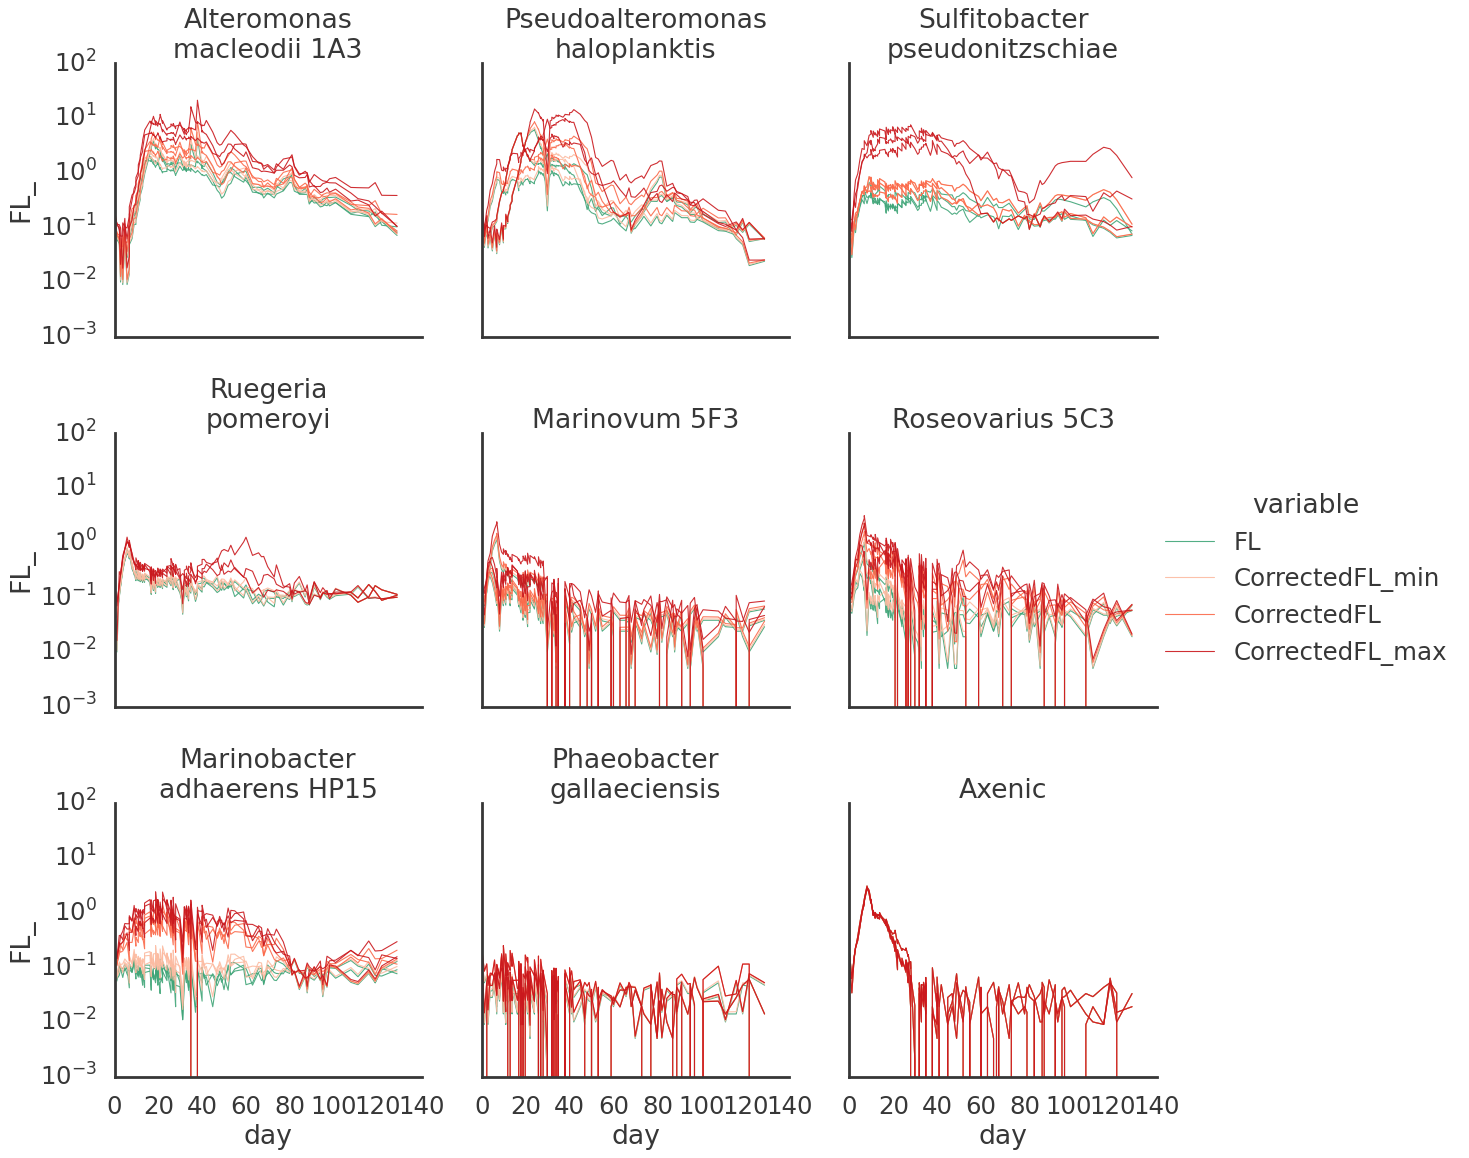

In [84]:
tmporder = ['FL', 'CorrectedFL_min','CorrectedFL', 'CorrectedFL_max']
tmppalette = [PCOLOR] + reds
g= sns.relplot(data=mrel_mdf_fl,
    x='day', y='FL_', hue='variable', 
            hue_order=tmporder, palette=tmppalette,
            col='full name nl', col_wrap=3, #ms=4, markeredgewidth=0,
               alpha=0.9, 
            col_order=horder_nl,
            #style='replicate', #markers=True, lw=2, dashes=False,
            units='replicate', estimator=None,
            kind='line', #aspect=0.7, height=2.5,
            #legend=False, 
            lw=1,
              # height=3,
            #facet_kws=dict(sharey=False,),
           ).set(yscale='log') #, xticks=[0,60,120], yticks=[1e3,1e5, 1e7,1e9], ylim=(1e3,1e9), xlim=(0,140),
            #     ylabel='cell/ml', xlabel='day', )
g.set_titles('{col_name}')
#plt.tight_layout()
# for c,ax in g.axes_dict.items():
#     ax.axhline(1e6, ls='--')
#     sns.lineplot(
#         data=mmpn_df.loc[mmpn_df.variable.isin(['med4']) & mmpn_df['full name nl'].isin(['Axenic'])],
#     x='transfer day', y='value', c='black', marker="o",
#         ms=5, alpha=0.7,
#              lw=1,
#             errorbar=None, zorder=-100, markers=True, 
#             legend=False, ax=ax,
#     )


In [85]:
mpn_df.columns

Index(['Unnamed: 0', 'id', 'replicate', 'transfer', 'heterotroph', 'full name',
       'date', 'transfer day', 'Sample', 'beads | Count', 'total',
       'het | Count', 'het | Mean (FITC-H)', 'het | Mean (FSC-H)',
       'het | Median (FITC-H)', 'med4', 'med4 beads | Count', 'med4 | Count',
       'total - med4', 'timepoint_Sample', 'MPN', 'RI', 'MPN_valid', 'FCM',
       'Pro/FCM', 'Pro/MPN', 'Het/Pro (FCM)', 'Het/Pro (MPN)', 'Group',
       'full name nl'],
      dtype='object')

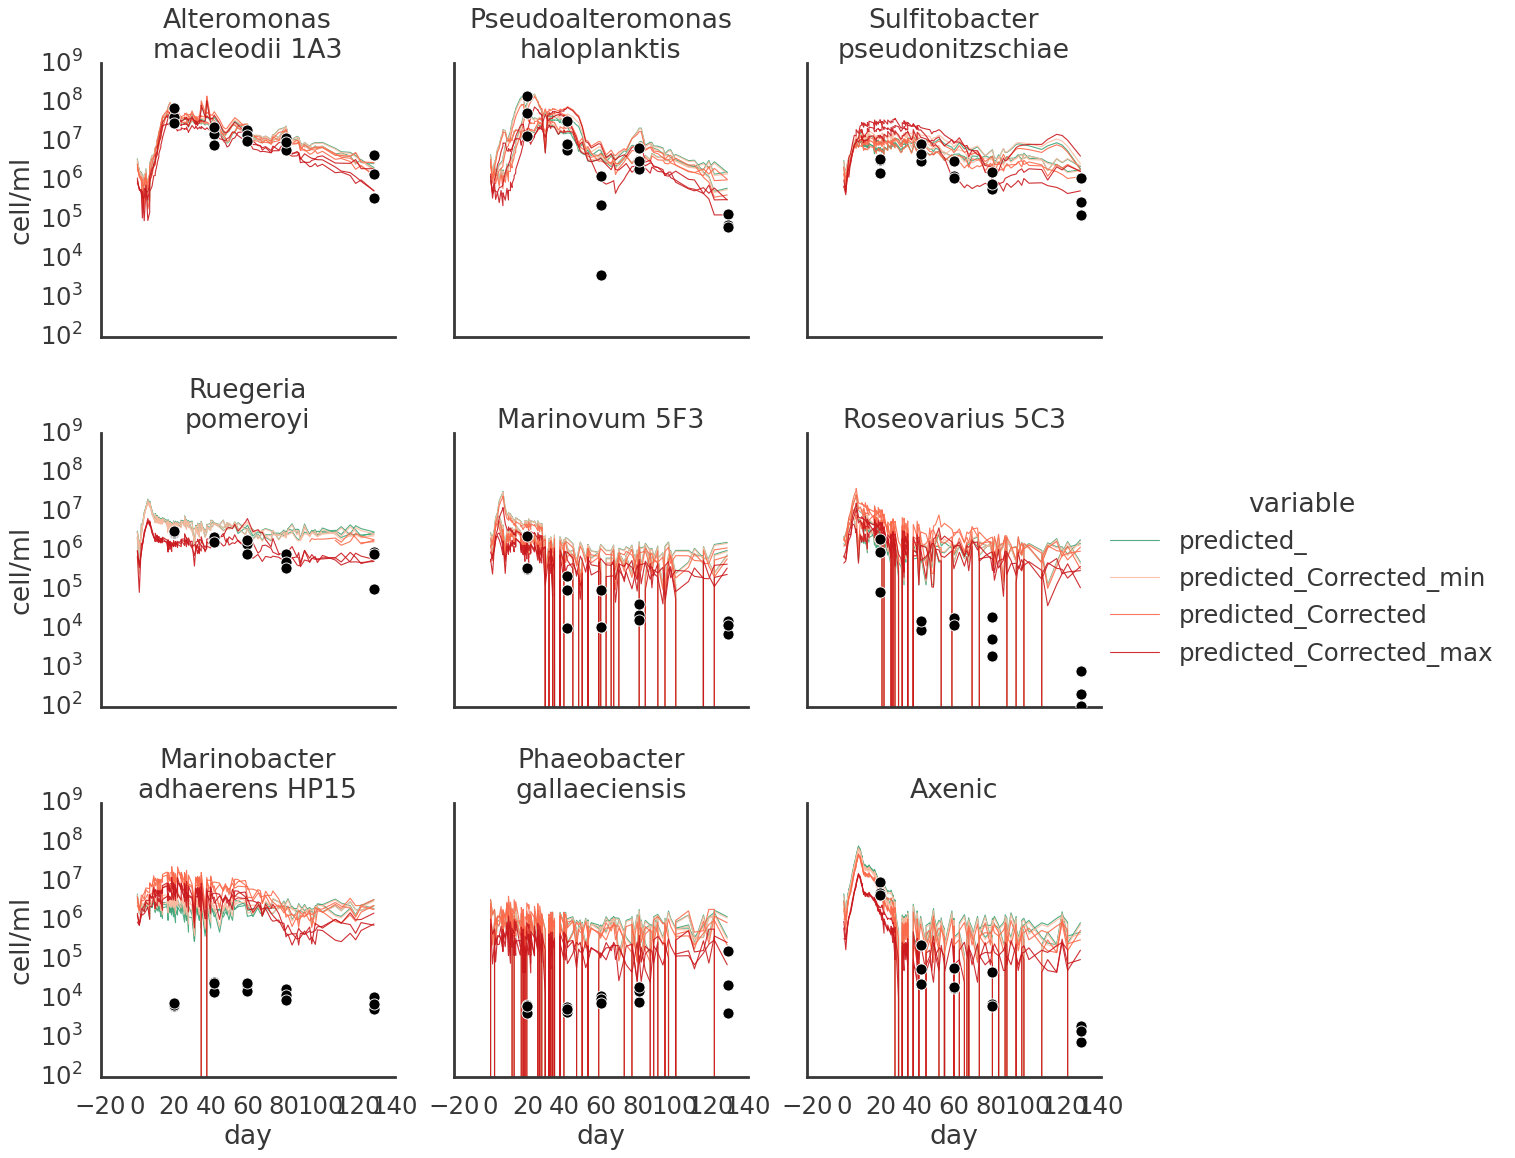

In [86]:
tmporder = ['predicted_', 'predicted_Corrected_min', 'predicted_Corrected','predicted_Corrected_max']
tmppalette = [PCOLOR] + reds
g= sns.relplot(data=mrel_mdf_cells,
    x='day', y='cell/ml', hue='variable', 
            hue_order=tmporder, palette=tmppalette,
            col='full name nl', col_wrap=3, #ms=4, markeredgewidth=0,
               alpha=0.9, 
            col_order=horder_nl,
            #style='replicate', #markers=True, lw=2, dashes=False,
            units='replicate', estimator=None,
            kind='line', #aspect=0.7, height=2.5,
            #legend=False, 
               lw=1,
            
            #facet_kws=dict(sharey=False,),
           ).set(yscale='log') #, xticks=[0,60,120], yticks=[1e3,1e5, 1e7,1e9], ylim=(1e3,1e9), xlim=(0,140),
            #     ylabel='cell/ml', xlabel='day', )
g.set_titles('{col_name}')
#plt.tight_layout()
for c,ax in g.axes_dict.items():
    sns.scatterplot(
        data=mpn_df.loc[mpn_df['full name nl'].isin([c])],
    x='transfer day', y='med4', c='black', s=100, zorder =100, #marker="o",
        #ms=5, alpha=0.7,
         #    lw=1,
            #errorbar=None, zorder=-100, markers=True, 
            legend=False, ax=ax,
    )


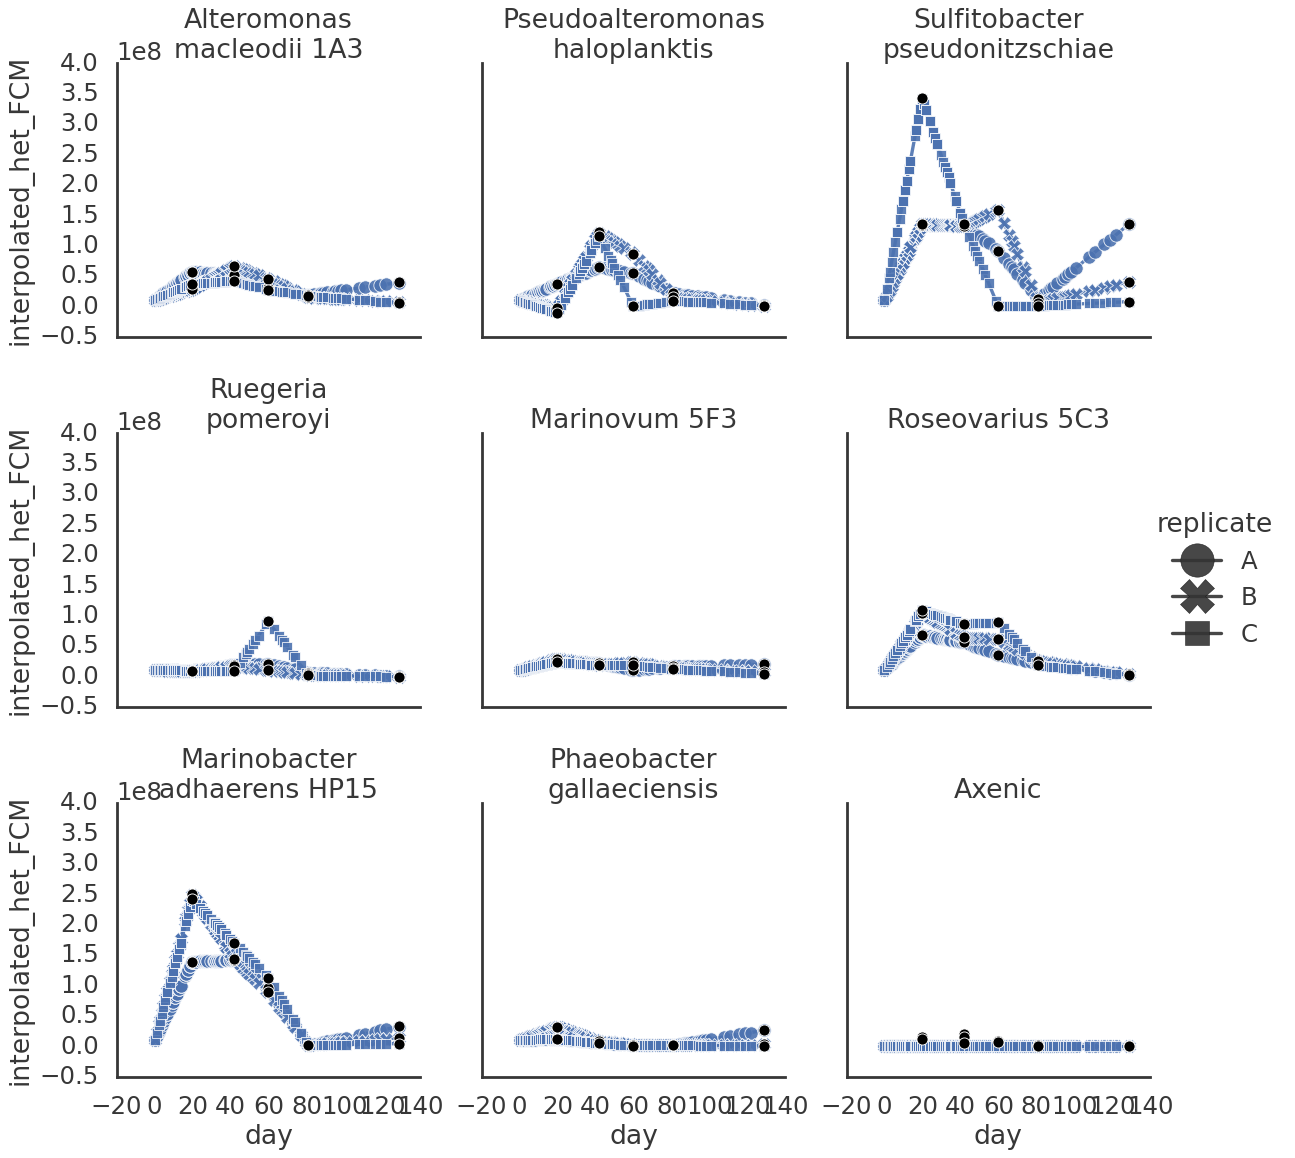

In [87]:
#tmporder = ['predicted_', 'predicted_Corrected_min', 'predicted_Corrected','predicted_Corrected_max']
#tmppalette = [PCOLOR] + reds
g= sns.relplot(data=rel_mdf,
    x='day', y='interpolated_het_FCM', #hue='variable', 
            #hue_order=tmporder, palette=tmppalette,
            col='full name nl', col_wrap=3, #ms=4, markeredgewidth=0,
               alpha=0.9, 
            col_order=horder_nl,
            style='replicate', markers=True, dashes=False,
            units='replicate', estimator=None,
            kind='line', #aspect=0.7, height=2.5,
            #legend=False, 
            
            #facet_kws=dict(sharey=False,),
           )# .set(yscale='log') #, xticks=[0,60,120], yticks=[1e3,1e5, 1e7,1e9], ylim=(1e3,1e9), xlim=(0,140),
            #     ylabel='cell/ml', xlabel='day', )
g.set_titles('{col_name}')
#plt.tight_layout()
for c,ax in g.axes_dict.items():
    sns.scatterplot(
        data=mpn_df.loc[mpn_df['full name nl'].isin([c])],
    x='transfer day', y='total - med4', c='black', s=100, zorder =100, #marker="o",
        #ms=5, alpha=0.7,
         #    lw=1,
            #errorbar=None, zorder=-100, markers=True, 
            legend=False, ax=ax,
    )


In [88]:
mpn_df.columns

Index(['Unnamed: 0', 'id', 'replicate', 'transfer', 'heterotroph', 'full name',
       'date', 'transfer day', 'Sample', 'beads | Count', 'total',
       'het | Count', 'het | Mean (FITC-H)', 'het | Mean (FSC-H)',
       'het | Median (FITC-H)', 'med4', 'med4 beads | Count', 'med4 | Count',
       'total - med4', 'timepoint_Sample', 'MPN', 'RI', 'MPN_valid', 'FCM',
       'Pro/FCM', 'Pro/MPN', 'Het/Pro (FCM)', 'Het/Pro (MPN)', 'Group',
       'full name nl'],
      dtype='object')

# Estimate biomass for all training sample to fit into the classifier

Use the max corrected FL number where available

In [89]:
results = model_fit_correctedfl_max

In [90]:
rel_mdf

,day,Sample,FL,id,replicate,transfer,heterotroph,full name,date,transfer day,...,het_penalty_factor_max,CorrectedFL,CorrectedFL_min,CorrectedFL_max,roundday,predicted_,predicted_Corrected,predicted_Corrected_min,predicted_Corrected_max,full name nl
0,0.000000,1A0,0.122,1,A,0,Axenic,Axenic,2021-04-22 16:12:00,0.0,...,0.895237,0.122000,0.122000,0.122000,0,3.204247e+06,2.032579e+06,2.863196e+06,6.345294e+05,Axenic
1,0.000000,2A0,0.136,2,A,0,HOT1A3,A. macleodii 1A3,2021-04-22 16:12:00,0.0,...,1.622824,0.155085,0.144628,0.220704,0,3.571947e+06,2.583792e+06,3.394241e+06,1.147895e+06,Alteromonas\nmacleodii 1A3
2,0.000000,2B0,0.102,2,B,0,HOT1A3,A. macleodii 1A3,2021-04-22 16:12:00,0.0,...,1.622824,0.116314,0.108471,0.165528,0,2.678960e+06,1.937844e+06,2.545681e+06,8.609214e+05,Alteromonas\nmacleodii 1A3
3,0.000000,2C0,0.118,2,C,0,HOT1A3,A. macleodii 1A3,2021-04-22 16:12:00,0.0,...,1.622824,0.134559,0.125486,0.191493,0,3.099189e+06,2.241820e+06,2.945003e+06,9.959679e+05,Alteromonas\nmacleodii 1A3
4,0.000000,3A0,0.107,3,A,0,HP15,Marinobacter adhaerens HP15,2021-04-22 16:12:00,0.0,...,1.622824,0.143603,0.113788,0.173642,0,2.810282e+06,2.392502e+06,2.670469e+06,9.031235e+05,Marinobacter\nadhaerens HP15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3535,128.767361,11B0,0.019,11,B,0,HOT5_C3,Roseovarius 5C3,2021-04-22 16:12:00,0.0,...,1.119846,0.020237,0.019727,0.021277,128,4.990220e+05,3.371646e+05,4.629746e+05,1.106633e+05,Roseovarius 5C3
3536,128.767361,7A0,0.075,7,A,0,nitzsch,Sulfitobacter pseudonitzschiae,2021-04-22 16:12:00,0.0,...,10.746442,0.113992,0.113992,0.805983,128,1.969824e+06,1.899162e+06,2.675259e+06,4.191967e+06,Sulfitobacter\npseudonitzschiae
3537,128.767361,9A0,0.024,9,A,0,k-12,E. coli,2021-04-22 16:12:00,0.0,...,0.901072,0.024000,0.024000,0.024000,128,6.303436e+05,3.998515e+05,5.632517e+05,1.248255e+05,NaN
3538,128.767361,6C0,0.109,6,C,0,DSS-3,Ruegeria pomeroyi,2021-04-22 16:12:00,0.0,...,0.848308,0.109000,0.109000,0.109000,128,2.862810e+06,1.815992e+06,2.558101e+06,5.669156e+05,Ruegeria\npomeroyi


In [93]:
rel_mdf['predicted'] = model_fit_correctedfl_max.predict(rel_mdf['CorrectedFL_max'])
rel_mdf['ref_Bp[N]'] = rel_mdf['predicted']* Qp * 1e3
rel_mdf['ref_Bp[C]'] = rel_mdf['ref_Bp[N]'] * 6.625
rel_mdf['t'] = rel_mdf['day'] * 3600 * 24


In [150]:
predicted_below_LOD = model_fit_correctedfl_max.predict([0.04, 0.1])
f'{predicted_below_LOD[0]:.2e}, {predicted_below_LOD[1]:.2e}, '

'2.08e+05, 5.20e+05, '

In [95]:
predicted_below_LOD * Qp * 1e3, 1e6* Qp * 1e3, 

(array([0.18575217, 0.46438043]), 0.8928571428571429)

In [96]:
pmdf = rel_mdf.groupby([ 'Sample', 'id', 'replicate', 'transfer', 'transfer day', 'heterotroph',
       'full name', 'Group','t','day',])[['FL', 'ref_Bp[N]','ref_Bp[C]',]].mean().reset_index()



In [97]:
# some samples were dropped midway
problematic_samples = pmdf.loc[pmdf.isna().any(axis=1), 'Sample'].unique()
pmdf = pmdf.loc[~pmdf.Sample.isin(problematic_samples)]
pmdf.loc[pmdf.isna().any(axis=1)]


,Sample,id,replicate,transfer,transfer day,heterotroph,full name,Group,t,day,FL,ref_Bp[N],ref_Bp[C]


In [98]:
problematic_samples

array([], dtype=object)

In [99]:
pmdf.loc[pmdf.Sample.isin(problematic_samples)]

,Sample,id,replicate,transfer,transfer day,heterotroph,full name,Group,t,day,FL,ref_Bp[N],ref_Bp[C]


In [100]:
pmdf

,Sample,id,replicate,transfer,transfer day,heterotroph,full name,Group,t,day,FL,ref_Bp[N],ref_Bp[C]
0,10A0,10,A,0,0.0,HOT5_F3,Marinovum 5F3,Weak,0.0,0.000000,0.061,0.459701,3.045517
1,10A0,10,A,0,0.0,HOT5_F3,Marinovum 5F3,Weak,93480.0,1.081944,0.088,0.687381,4.553901
2,10A0,10,A,0,0.0,HOT5_F3,Marinovum 5F3,Weak,187020.0,2.164583,0.121,0.978455,6.482263
3,10A0,10,A,0,0.0,HOT5_F3,Marinovum 5F3,Weak,237360.0,2.747222,0.189,1.556327,10.310666
4,10A0,10,A,0,0.0,HOT5_F3,Marinovum 5F3,Weak,324360.0,3.754167,0.275,2.334899,15.468703
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2215,9C0,9,C,0,0.0,k-12,E. coli,nan,9585540.0,110.943750,0.049,0.222880,1.476577
2216,9C0,9,C,0,0.0,k-12,E. coli,nan,10009080.0,115.845833,0.019,0.088232,0.584539
2217,9C0,9,C,0,0.0,k-12,E. coli,nan,10263360.0,118.788889,0.000,0.000000,0.000000
2218,9C0,9,C,0,0.0,k-12,E. coli,nan,10521600.0,121.777778,0.039,0.181108,1.199843


In [101]:
#uncomment to recreate

pmdf.loc[pmdf.transfer.isin([0]) & ~pmdf.id.isin([8])].to_excel('shading_reference_10cc.xlsx', index=False)


In [102]:
pmdf.loc[mdf.transfer.isin([0]) & ~pmdf.id.isin([8])].groupby(['Sample', 't']).size().sort_values()

Sample  t        
10A0    0.0          1
4A0     4217220.0    1
        4140180.0    1
        4043040.0    1
        3867180.0    1
                    ..
1B0     5672280.0    1
        5433900.0    1
        5176380.0    1
        4734180.0    1
6C0     1108560.0    1
Length: 1716, dtype: int64

In [103]:
pmdf.groupby('transfer day').day.max()

transfer day
0.0    128.767361
Name: day, dtype: float64

# additional data sets

## Yara

In [104]:
xlsx_fname = 'data/Growth curves A-D Yara.xlsx'
y = pd.read_excel(xlsx_fname, sheet_name=None, index_col=[0,1,2], header=None)

In [105]:
def _process(k,d):
    df = d.T
    id_vars = [i for i in df.columns if i[2] in ['Day', 'Date']]
    mdf = df.melt(id_vars=id_vars, var_name=['Sample', 'strain', 'media'], value_name='FL'
                 ).rename(columns={i : i[2] for i in id_vars})
    mdf['sheet_name'] = k
    
    return mdf

yara_df = pd.concat([_process(k, y[k]) for k in y])
yara_df = yara_df.rename(columns={'Day': 'day'})
yara_df['group_sample'] = (yara_df['sheet_name'] + (yara_df['Sample']).astype('string')).astype('object')

In [106]:
gmap = {  '(-) Pro99': 'Pro99',
       '(-) lowN' : 'lowN', '(-) lowP 1:8' : 'lowP(1:8)', '(-) lowP 1:50' :  'lowP(1:50)', }
for i,j in gmap.items():
    yara_df.loc[yara_df.media.isin([i]), 'media'] = j

In [107]:
yara_df = yara_df.reset_index(drop=True)

In [108]:
problematic_samples_yara = yara_df.loc[yara_df.isna().any(axis=1), 'group_sample'].unique()
problematic_samples_yara

array(['SetUp- GroupC 1.0', 'SetUp- GroupC 2.0', 'SetUp- GroupC 3.0',
       'SetUp- GroupC 4.0', 'SetUp- GroupC 5.0', 'SetUp- GroupC 6.0',
       'SetUp- GroupC 7.0', 'SetUp- GroupC 8.0', 'SetUp- GroupC 9.0',
       'SetUp- GroupC 10.0', 'SetUp- GroupC 11.0', 'SetUp- GroupC 12.0',
       'SetUp- GroupC 13.0', 'SetUp- GroupC 14.0', 'SetUp- GroupC 15.0',
       'SetUp- GroupC 16.0', 'SetUp- GroupC 17.0', 'SetUp- GroupC 18.0',
       'SetUp- GroupC 19.0', 'SetUp- GroupC 20.0', 'SetUp- GroupC 21.0',
       'SetUp- GroupC 22.0', 'SetUp- GroupC 23.0', 'SetUp- GroupC 24.0',
       'SetUp- GroupC 25.0', 'SetUp- GroupC 26.0', 'SetUp- GroupC 27.0',
       'SetUp- GroupC 28.0', 'SetUp- GroupC 29.0', 'SetUp- GroupC 30.0',
       'SetUp- GroupC 31.0', 'SetUp- GroupC 32.0', 'SetUp- GroupC 33.0',
       'SetUp- GroupC 34.0', 'SetUp- GroupC 35.0', 'SetUp- GroupC 36.0',
       'SetUp- GroupC 37.0', 'SetUp- GroupC 38.0', 'SetUp- GroupC 39.0',
       'SetUp- GroupC 40.0', 'SetUp- GroupC 41.0', 'SetUp- G

In [ ]:
yara_df

In [109]:
yara_df.dropna(axis=0, subset='FL', inplace=True)

In [110]:
yara_df.columns

Index(['Date', 'day', 'Sample', 'strain', 'media', 'FL', 'sheet_name',
       'group_sample'],
      dtype='object')

In [111]:
yara_df['Sample_prev'] = yara_df['Sample']
yara_df['Sample'] = (
    'Ax_Media_'+
    yara_df.sheet_name.str.replace('SetUp- Group', '', regex=False).replace('SetUp-GroupA','A', regex=False).str.strip() + 
    yara_df.Sample.astype(int).astype(str))

In [112]:
yara_df.Sample.value_counts().value_counts()

count
60    76
57    76
58    64
52    48
59    16
Name: count, dtype: int64

In [113]:
yara_df.head()

,Date,day,Sample,strain,media,FL,sheet_name,group_sample,Sample_prev
0,2022-12-05 15:49:00,0,Ax_Media_A1,MED4,Pro99,0.095,SetUp-GroupA,SetUp-GroupA1.0,1.0
1,2022-12-06 12:21:00,0.855556,Ax_Media_A1,MED4,Pro99,0.094,SetUp-GroupA,SetUp-GroupA1.0,1.0
2,2022-12-07 22:54:00,2.295139,Ax_Media_A1,MED4,Pro99,0.217,SetUp-GroupA,SetUp-GroupA1.0,1.0
3,2022-12-08 15:03:00,2.968056,Ax_Media_A1,MED4,Pro99,0.24,SetUp-GroupA,SetUp-GroupA1.0,1.0
4,2022-12-09 22:05:00,4.261111,Ax_Media_A1,MED4,Pro99,0.533,SetUp-GroupA,SetUp-GroupA1.0,1.0


In [114]:
yara_df.dtypes

Date            datetime64[ns]
day                     object
Sample                  object
strain                  object
media                   object
FL                      object
sheet_name              object
group_sample            object
Sample_prev            float64
dtype: object

In [115]:
yara_df['id'] = yara_df['strain'].astype(str) + '_' +  yara_df['media']

In [116]:
yara_df['id'].unique()

array(['MED4_Pro99', 'MED4_lowN', 'MED4_lowP(1:8)', 'MED4_lowP(1:50)',
       '9312_Pro99', '9312_lowN', '9312_lowP(1:8)', '9312_lowP(1:50)',
       '9313_Pro99', '9313_lowN', '9313_lowP(1:8)', '9313_lowP(1:50)',
       '1327_Pro99', '1327_lowN', '1327_lowP(1:8)', '1327_lowP(1:50)',
       'MIT0604_Pro99', 'MIT0604_lowN', 'MIT0604_lowP(1:8)',
       'MIT0604_lowP(1:50)', 'NATL2A_Pro99', 'NATL2A_lowN',
       'NATL2A_lowP(1:8)', 'NATL2A_lowP(1:50)', 'ctrl_Pro99', 'ctrl_lowN',
       'ctrl_lowP(1:8)', 'ctrl_lowP(1:50)', '9515_Pro99', '9515_lowN',
       '9515_lowP(1:8)', '9515_lowP(1:50)', '9215_Pro99', '9215_lowN',
       '9215_lowP(1:8)', '9215_lowP(1:50)', 'AS9601_Pro99', 'AS9601_lowN',
       'AS9601_lowP(1:8)', 'AS9601_lowP(1:50)', 'PAC1_Pro99', 'PAC1_lowN',
       'PAC1_lowP(1:8)', 'PAC1_lowP(1:50)', '9202_Pro99', '9202_lowN',
       '9202_lowP(1:8)', '9202_lowP(1:50)', 'SB_Pro99', 'SB_lowN',
       'SB_lowP(1:8)', 'SB_lowP(1:50)', 'MIT0609_Pro99', 'MIT0609_lowN',
       'MIT0609_l

In [117]:
yara_df['Sample'].value_counts()

Sample
Ax_Media_A1     60
Ax_Media_A50    60
Ax_Media_A57    60
Ax_Media_A56    60
Ax_Media_A55    60
                ..
Ax_Media_C35    52
Ax_Media_C34    52
Ax_Media_C33    52
Ax_Media_C32    52
Ax_Media_C5     52
Name: count, Length: 280, dtype: int64

In [118]:
cols = ['Sample', 'id',  'day', 'strain', 'media', 'FL', ]
yara_df = yara_df[cols].copy()
yara_df['t'] = yara_df['day'] * 3600 * 24

In [119]:
yara_df['Group'] = 'Axenic'
yara_df.loc[~yara_df['strain'].isin(['MED4']),'Group'] = 'Axenic_Other'
yara_df.loc[~yara_df['media'].isin(['lowN']),'Group'] = 'Axenic_Other'
yara_df['full name'] = 'Axenic_' + yara_df['id']
yara_df['predicted'] = model_fit_correctedfl_max.predict(yara_df['FL'])
yara_df['ref_Bp[N]'] = yara_df['predicted']* Qp * 1e3
yara_df['ref_Bp[C]'] = yara_df['ref_Bp[N]'] * 6.625


In [120]:
yara_df.columns

Index(['Sample', 'id', 'day', 'strain', 'media', 'FL', 't', 'Group',
       'full name', 'predicted', 'ref_Bp[N]', 'ref_Bp[C]'],
      dtype='object')

In [121]:
yara_df.head()

,Sample,id,day,strain,media,FL,t,Group,full name,predicted,ref_Bp[N],ref_Bp[C]
0,Ax_Media_A1,MED4_Pro99,0,MED4,Pro99,0.095,0,Axenic_Other,Axenic_MED4_Pro99,494100.779368,0.441161,2.922694
1,Ax_Media_A1,MED4_Pro99,0.855556,MED4,Pro99,0.094,73920.0,Axenic_Other,Axenic_MED4_Pro99,488899.718532,0.436518,2.891929
2,Ax_Media_A1,MED4_Pro99,2.295139,MED4,Pro99,0.217,198300.0,Axenic_Other,Axenic_MED4_Pro99,1128630.201292,1.007706,6.676049
3,Ax_Media_A1,MED4_Pro99,2.968056,MED4,Pro99,0.24,256440.0,Axenic_Other,Axenic_MED4_Pro99,1248254.600508,1.114513,7.383649
4,Ax_Media_A1,MED4_Pro99,4.261111,MED4,Pro99,0.533,368160.0,Axenic_Other,Axenic_MED4_Pro99,2772165.425294,2.475148,16.397854


In [122]:
yara_df.groupby(['Group', 'id','full name',  ]).size().head(50)


Group         id                  full name                
Axenic        MED4_lowN           Axenic_MED4_lowN             681
Axenic_Other  1314_Pro99          Axenic_1314_Pro99            174
              1314_lowN           Axenic_1314_lowN             174
              1314_lowP(1:50)     Axenic_1314_lowP(1:50)       174
              1314_lowP(1:8)      Axenic_1314_lowP(1:8)        174
              1327_Pro99          Axenic_1327_Pro99            180
              1327_lowN           Axenic_1327_lowN             180
              1327_lowP(1:50)     Axenic_1327_lowP(1:50)       180
              1327_lowP(1:8)      Axenic_1327_lowP(1:8)        180
              9202_Pro99          Axenic_9202_Pro99            156
              9202_lowN           Axenic_9202_lowN             156
              9202_lowP(1:50)     Axenic_9202_lowP(1:50)       156
              9202_lowP(1:8)      Axenic_9202_lowP(1:8)        156
              9215_Pro99          Axenic_9215_Pro99            171
  

In [123]:
#uncomment to recreate

yara_df.to_excel('shading_reference_yara_axenic.xlsx', index=False)


## 5x5

In [151]:
ccpa_df = pd.read_pickle('data/CCPA.pkl.gz')
ccpa_df.loc[ccpa_df.PRO == 'C9B', 'PRO'] = 'MIT0604'


In [152]:
ccpa_df['FL'] = ccpa_df['FL_orig']

In [153]:
ccpa_df

,day,experiment,sample,FL,PRO,ALT,culture,FL_orig,logFL,cumsumFL,cumsumlogFL,zscoreFL,diffFL,difflogFL,diffday,rateFL,ratelogFL,experiment_sample
0,0.000000,e1,1A,0.133,MED4,1A3,Co_Culture,0.133,-2.017406,0.133,-2.017406,-0.588889,NaN,NaN,NaN,NaN,NaN,"e1, 1A"
1,0.715972,e1,1A,0.159,MED4,1A3,Co_Culture,0.159,-1.838851,0.292,-3.856257,-0.575917,0.026,0.178555,0.715972,0.036314,0.249388,"e1, 1A"
2,1.925694,e1,1A,0.155,MED4,1A3,Co_Culture,0.155,-1.864330,0.447,-5.720587,-0.577913,-0.004,-0.025479,1.209722,-0.003307,-0.021062,"e1, 1A"
3,2.831250,e1,1A,0.180,MED4,1A3,Co_Culture,0.180,-1.714798,0.627,-7.435386,-0.565440,0.025,0.149532,0.905556,0.027607,0.165127,"e1, 1A"
4,6.674306,e1,1A,0.632,MED4,1A3,Co_Culture,0.632,-0.458866,1.259,-7.894252,-0.339936,0.452,1.255933,3.843056,0.117615,0.326806,"e1, 1A"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4023,107.860000,e7,37C,0.065,all,all,All_strains,0.065,-2.733368,13.159,-89.618974,-0.486736,0.014,0.242562,4.240000,0.003302,0.057208,"e7, 37C"
4024,109.710000,e7,37C,0.014,all,all,All_strains,0.014,-2.995732,13.209,-92.614706,-0.525767,-0.015,-0.262364,1.850000,-0.008108,-0.141819,"e7, 37C"
4025,114.600000,e7,37C,0.014,all,all,All_strains,0.014,-2.995732,13.259,-95.610438,-0.525767,0.000,0.000000,4.890000,0.000000,0.000000,"e7, 37C"
4026,116.700000,e7,37C,0.032,all,all,All_strains,0.032,-2.995732,13.309,-98.606171,-0.525767,0.000,0.000000,2.100000,0.000000,0.000000,"e7, 37C"


In [154]:
ccpa_df.columns

Index(['day', 'experiment', 'sample', 'FL', 'PRO', 'ALT', 'culture', 'FL_orig',
       'logFL', 'cumsumFL', 'cumsumlogFL', 'zscoreFL', 'diffFL', 'difflogFL',
       'diffday', 'rateFL', 'ratelogFL', 'experiment_sample'],
      dtype='object')

In [155]:
ccpa_df.head()

,day,experiment,sample,FL,PRO,ALT,culture,FL_orig,logFL,cumsumFL,cumsumlogFL,zscoreFL,diffFL,difflogFL,diffday,rateFL,ratelogFL,experiment_sample
0,0.000000,e1,1A,0.133,MED4,1A3,Co_Culture,0.133,-2.017406,0.133,-2.017406,-0.588889,NaN,NaN,NaN,NaN,NaN,"e1, 1A"
1,0.715972,e1,1A,0.159,MED4,1A3,Co_Culture,0.159,-1.838851,0.292,-3.856257,-0.575917,0.026,0.178555,0.715972,0.036314,0.249388,"e1, 1A"
2,1.925694,e1,1A,0.155,MED4,1A3,Co_Culture,0.155,-1.864330,0.447,-5.720587,-0.577913,-0.004,-0.025479,1.209722,-0.003307,-0.021062,"e1, 1A"
3,2.831250,e1,1A,0.180,MED4,1A3,Co_Culture,0.180,-1.714798,0.627,-7.435386,-0.565440,0.025,0.149532,0.905556,0.027607,0.165127,"e1, 1A"
4,6.674306,e1,1A,0.632,MED4,1A3,Co_Culture,0.632,-0.458866,1.259,-7.894252,-0.339936,0.452,1.255933,3.843056,0.117615,0.326806,"e1, 1A"


In [156]:
ccpa_df.loc[ccpa_df.FL_orig.isna()]


,day,experiment,sample,FL,PRO,ALT,culture,FL_orig,logFL,cumsumFL,cumsumlogFL,zscoreFL,diffFL,difflogFL,diffday,rateFL,ratelogFL,experiment_sample


In [157]:
ccpa_df['transfer'] = ccpa_df.experiment.str.replace('e', '').astype(int) 
ccpa_df.loc[ccpa_df['transfer'].isin([1]), 'transfer'] = 0
ccpa_df['transfer'].unique()

array([0, 2, 3, 4, 5, 6, 7])

In [158]:
ccpa_df['Sample'] = '5x5_' + ccpa_df['sample'] + ccpa_df.transfer.astype(str)
ccpa_df['Sample'].unique()

array(['5x5_1A0', '5x5_1B0', '5x5_1C0', '5x5_2A0', '5x5_2B0', '5x5_2C0',
       '5x5_3A0', '5x5_3B0', '5x5_3C0', '5x5_4A0', '5x5_4B0', '5x5_4C0',
       '5x5_5A0', '5x5_5B0', '5x5_5C0', '5x5_6A0', '5x5_6B0', '5x5_6C0',
       '5x5_7A0', '5x5_7B0', '5x5_7C0', '5x5_8A0', '5x5_8B0', '5x5_8C0',
       '5x5_9A0', '5x5_9B0', '5x5_9C0', '5x5_10A0', '5x5_10B0',
       '5x5_10C0', '5x5_11A0', '5x5_11B0', '5x5_11C0', '5x5_12A0',
       '5x5_12B0', '5x5_12C0', '5x5_13A0', '5x5_13B0', '5x5_13C0',
       '5x5_14A0', '5x5_14B0', '5x5_14C0', '5x5_15A0', '5x5_15B0',
       '5x5_15C0', '5x5_16A0', '5x5_16B0', '5x5_16C0', '5x5_17A0',
       '5x5_17B0', '5x5_17C0', '5x5_18A0', '5x5_18B0', '5x5_18C0',
       '5x5_19A0', '5x5_19B0', '5x5_19C0', '5x5_20A0', '5x5_20B0',
       '5x5_20C0', '5x5_21A0', '5x5_21B0', '5x5_21C0', '5x5_22A0',
       '5x5_22B0', '5x5_22C0', '5x5_23A0', '5x5_23B0', '5x5_23C0',
       '5x5_24A0', '5x5_24B0', '5x5_24C0', '5x5_25C0', '5x5_26C0',
       '5x5_27A0', '5x5_27B0', '5x5_27C0'

In [159]:
ccpa_df.Sample.value_counts().value_counts()

count
88    91
29    78
78    77
53    76
79    74
54    70
65    69
Name: count, dtype: int64

In [160]:
ccpa_df.dtypes

day                  float64
experiment            object
sample                object
FL                   float64
PRO                   object
ALT                   object
culture               object
FL_orig              float64
logFL                float64
cumsumFL             float64
cumsumlogFL          float64
zscoreFL             float64
diffFL               float64
difflogFL            float64
diffday              float64
rateFL               float64
ratelogFL            float64
experiment_sample     object
transfer               int64
Sample                object
dtype: object

In [161]:
ccpa_df['id'] = ccpa_df['PRO'] + '_' +  ccpa_df['ALT']

In [162]:
ccpa_df['id'].unique()

array(['MED4_1A3', 'MIT9313_1A3', 'MIT9312_1A3', 'Natl2A_1A3',
       'MIT0604_1A3', 'MED4_DE', 'MIT9313_DE', 'MIT9312_DE', 'Natl2A_DE',
       'MIT0604_DE', 'MED4_DE1', 'MIT9313_DE1', 'MIT9312_DE1',
       'Natl2A_DE1', 'MIT0604_DE1', 'MED4_BS11', 'MIT9313_BS11',
       'MIT9312_BS11', 'Natl2A_BS11', 'MIT0604_BS11', 'MED4_ATCC',
       'MIT9313_ATCC', 'MIT9312_ATCC', 'Natl2A_ATCC', 'MIT0604_ATCC',
       'MIT0604_Ax_Pro', 'Natl2A_Ax_Pro', 'MIT9312_Ax_Pro',
       'MIT9313_Ax_Pro', 'MED4_Ax_Pro', 'allP_all_Pro', 'all_all'],
      dtype=object)

In [163]:
ccpa_df['Sample'].value_counts()

Sample
5x5_1A0     88
5x5_20B0    88
5x5_23B0    88
5x5_23A0    88
5x5_22C0    88
            ..
5x5_9A2     29
5x5_8C2     29
5x5_8B2     29
5x5_8A2     29
5x5_37C2    29
Name: count, Length: 535, dtype: int64

In [164]:
ccpa_df.columns

Index(['day', 'experiment', 'sample', 'FL', 'PRO', 'ALT', 'culture', 'FL_orig',
       'logFL', 'cumsumFL', 'cumsumlogFL', 'zscoreFL', 'diffFL', 'difflogFL',
       'diffday', 'rateFL', 'ratelogFL', 'experiment_sample', 'transfer',
       'Sample', 'id'],
      dtype='object')

In [165]:
fullname_map = {
    '1A3'  : 'A. macleodii HOT1A3',
    'ATCC' : 'A. macleodii ATCC27126',
    'BS11' : 'A. macleodii BS11',
    'DE1'  : 'A. mediterranea AltDE1',
    'DE'   : 'A. mediterranea AltDE',
    'Ax_Pro' : 'Axenic',
    'all_Pro': 'Axenic',
    'all'    : 'Axenic',
}


In [166]:
ccpa_df['ALT'].unique()

array(['1A3', 'DE', 'DE1', 'BS11', 'ATCC', 'Ax_Pro', 'all_Pro', 'all'],
      dtype=object)

In [167]:
ccpa_df[['PRO', 'ALT', 'culture', 'Sample', 'id']].value_counts()

PRO      ALT     culture     Sample    id            
MED4     1A3     Co_Culture  5x5_1A0   MED4_1A3          88
MIT9312  BS11    Co_Culture  5x5_18C0  MIT9312_BS11      88
         ATCC    Co_Culture  5x5_23B0  MIT9312_ATCC      88
                             5x5_23C0  MIT9312_ATCC      88
         Ax_Pro  Axenic      5x5_28A0  MIT9312_Ax_Pro    88
                                                         ..
         BS11    Co_Culture  5x5_18A2  MIT9312_BS11      29
Natl2A   ATCC    Co_Culture  5x5_24A2  Natl2A_ATCC       29
MIT9312  BS11    Co_Culture  5x5_18B2  MIT9312_BS11      29
                             5x5_18C2  MIT9312_BS11      29
Natl2A   BS11    Co_Culture  5x5_19A2  Natl2A_BS11       29
Name: count, Length: 535, dtype: int64

In [168]:
ccpa_df['Group'] = 'Axenic'
ccpa_df['full name'] = 'Axenic_' + ccpa_df['PRO']


In [169]:
ccpa_df['culture'].unique()

array(['Co_Culture', 'Axenic', 'All_Pro', 'All_strains'], dtype=object)

In [170]:
ccpa_df['Group'] = ccpa_df['culture'].map({
    'Co_Culture': 'Strong', 
    'Axenic' : 'Axenic',
    'All_Pro' : 'Other', 'All_strains': 'Other'
                                          })

ccpa_df['full name'] = ccpa_df['ALT'].map(fullname_map)
ccpa_df.loc[ccpa_df['Group'].isin(['Axenic']), 'full name'] = 'Axenic_' + ccpa_df.loc[ccpa_df['Group'].isin(['Axenic']),'PRO']
ccpa_df.loc[ccpa_df['Group'].isin(['Axenic']) & ccpa_df['PRO'].isin(['MED4']), 'full name'] = 'Axenic'
ccpa_df.loc[ccpa_df['Group'].isin(['Strong']) & ~ccpa_df['PRO'].isin(['MED4']), 'Group'] = 'Strong_Other'
ccpa_df.loc[ccpa_df['Group'].isin(['Axenic']) & ~ccpa_df['PRO'].isin(['MED4']), 'Group'] = 'Axenic_Other'

ccpa_df['Group'].unique(), ccpa_df['full name'].unique()

(array(['Strong', 'Strong_Other', 'Axenic_Other', 'Axenic', 'Other'],
       dtype=object),
 array(['A. macleodii HOT1A3', 'A. mediterranea AltDE',
        'A. mediterranea AltDE1', 'A. macleodii BS11',
        'A. macleodii ATCC27126', 'Axenic_MIT0604', 'Axenic_Natl2A',
        'Axenic_MIT9312', 'Axenic_MIT9313', 'Axenic'], dtype=object))

In [171]:
ccpa_df.head()

,day,experiment,sample,FL,PRO,ALT,culture,FL_orig,logFL,cumsumFL,...,difflogFL,diffday,rateFL,ratelogFL,experiment_sample,transfer,Sample,id,Group,full name
0,0.000000,e1,1A,0.133,MED4,1A3,Co_Culture,0.133,-2.017406,0.133,...,NaN,NaN,NaN,NaN,"e1, 1A",0,5x5_1A0,MED4_1A3,Strong,A. macleodii HOT1A3
1,0.715972,e1,1A,0.159,MED4,1A3,Co_Culture,0.159,-1.838851,0.292,...,0.178555,0.715972,0.036314,0.249388,"e1, 1A",0,5x5_1A0,MED4_1A3,Strong,A. macleodii HOT1A3
2,1.925694,e1,1A,0.155,MED4,1A3,Co_Culture,0.155,-1.864330,0.447,...,-0.025479,1.209722,-0.003307,-0.021062,"e1, 1A",0,5x5_1A0,MED4_1A3,Strong,A. macleodii HOT1A3
3,2.831250,e1,1A,0.180,MED4,1A3,Co_Culture,0.180,-1.714798,0.627,...,0.149532,0.905556,0.027607,0.165127,"e1, 1A",0,5x5_1A0,MED4_1A3,Strong,A. macleodii HOT1A3
4,6.674306,e1,1A,0.632,MED4,1A3,Co_Culture,0.632,-0.458866,1.259,...,1.255933,3.843056,0.117615,0.326806,"e1, 1A",0,5x5_1A0,MED4_1A3,Strong,A. macleodii HOT1A3


In [172]:
ccpa_df['predicted'] = model_fit_correctedfl_max.predict(ccpa_df['FL'])
ccpa_df['ref_Bp[N]'] = ccpa_df['predicted']* Qp * 1e3
ccpa_df['ref_Bp[C]'] = ccpa_df['ref_Bp[N]'] * 6.625


In [173]:
ccpa_df['t'] = ccpa_df['day'] * 3600 * 24

In [174]:
ccpa_df = ccpa_df[[
    'Sample', 'id', 'transfer', 
     'PRO', 'ALT', 
    'full name', 'Group', 't', 'day', 'FL', 'ref_Bp[N]', 'ref_Bp[C]',
]]


In [175]:
ccpa_df.head()

,Sample,id,transfer,PRO,ALT,full name,Group,t,day,FL,ref_Bp[N],ref_Bp[C]
0,5x5_1A0,MED4_1A3,0,MED4,1A3,A. macleodii HOT1A3,Strong,0.000000,0.000000,0.133,0.617626,4.091772
1,5x5_1A0,MED4_1A3,0,MED4,1A3,A. macleodii HOT1A3,Strong,61859.999981,0.715972,0.159,0.738365,4.891667
2,5x5_1A0,MED4_1A3,0,MED4,1A3,A. macleodii HOT1A3,Strong,166379.999962,1.925694,0.155,0.719790,4.768607
3,5x5_1A0,MED4_1A3,0,MED4,1A3,A. macleodii HOT1A3,Strong,244620.000000,2.831250,0.180,0.835885,5.537737
4,5x5_1A0,MED4_1A3,0,MED4,1A3,A. macleodii HOT1A3,Strong,576660.000038,6.674306,0.632,2.934884,19.443609


In [176]:
ccpa_df.groupby(['Group', 'id','full name',  ]).size().head(50)


Group         id              full name             
Axenic        MED4_Ax_Pro     Axenic                     264
Axenic_Other  MIT0604_Ax_Pro  Axenic_MIT0604              88
              MIT9312_Ax_Pro  Axenic_MIT9312             264
              MIT9313_Ax_Pro  Axenic_MIT9313             264
              Natl2A_Ax_Pro   Axenic_Natl2A              264
Other         allP_all_Pro    Axenic                     892
              all_all         Axenic                    1338
Strong        MED4_1A3        A. macleodii HOT1A3       1208
              MED4_ATCC       A. macleodii ATCC27126    1115
              MED4_BS11       A. macleodii BS11         1129
              MED4_DE         A. mediterranea AltDE     1338
              MED4_DE1        A. mediterranea AltDE1    1338
Strong_Other  MIT0604_1A3     A. macleodii HOT1A3       1338
              MIT0604_ATCC    A. macleodii ATCC27126     446
              MIT0604_BS11    A. macleodii BS11         1273
              MIT0604_DE      A.

In [178]:
#uncomment to recreate
ccpa_df.to_excel('shading_reference_ccpa.xlsx', index=False)
